# Analysis of Natural Disasters in US over Time

## Ritvik Varkhedkar and Thomas Klaus

## Introduction

Intro will go here

## Required Libraries

In [2]:
# Imports
import requests
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Initial Cleaning

In [3]:
df = pd.read_csv("us_disaster_declarations.csv")
df.head()

'''['Tornado',
 'Flood',
 'Fire',
 'Hurricane',
 'Volcano',
 'Severe Storm(s)',
 'Typhoon',
 'Drought',
 'Snow',
 'Severe Ice Storm',
 'Freezing',
 'Coastal Storm',
 'Mud/Landslide',
 'Tsunami',]
 
 '''


# Removing types of disaster unrelated to climate change:
unrelated_types = ['Fishing Losses','Other', 'Volcano', 'Toxic Substances', 'Dam/Levee Break','Human Cause', 'Terrorist', 'Chemical', 'Biological']

u_rows = []
# For loop will loop through each row and keep track with a list which rows are unrelated
for index, row in df.iterrows():
    if row.incident_type  in unrelated_types:
        u_rows.append(index)


# Dropping rows of unrelated types
df = df.drop(u_rows)

df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,bb121323c9c29d3bef0c9a3f134bfd8b5ecff148,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025780
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,c879557e78d059e6847e7688388c339d10f51979,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025783
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,4fb19699fdbba1387ffa2263fcc4a4e37a1de6d6,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025777
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,87a0c1dd5da249767f545e0c0a43f917e4e9ca83,2021-07-13T23:01:19Z,60c3b7a9a0ee349d7102577a
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,954449c15634fb45c8bea3ac975782793ccde050,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025774


## Charting Frequency of Natural Disasters over time

<AxesSubplot:xlabel='year'>

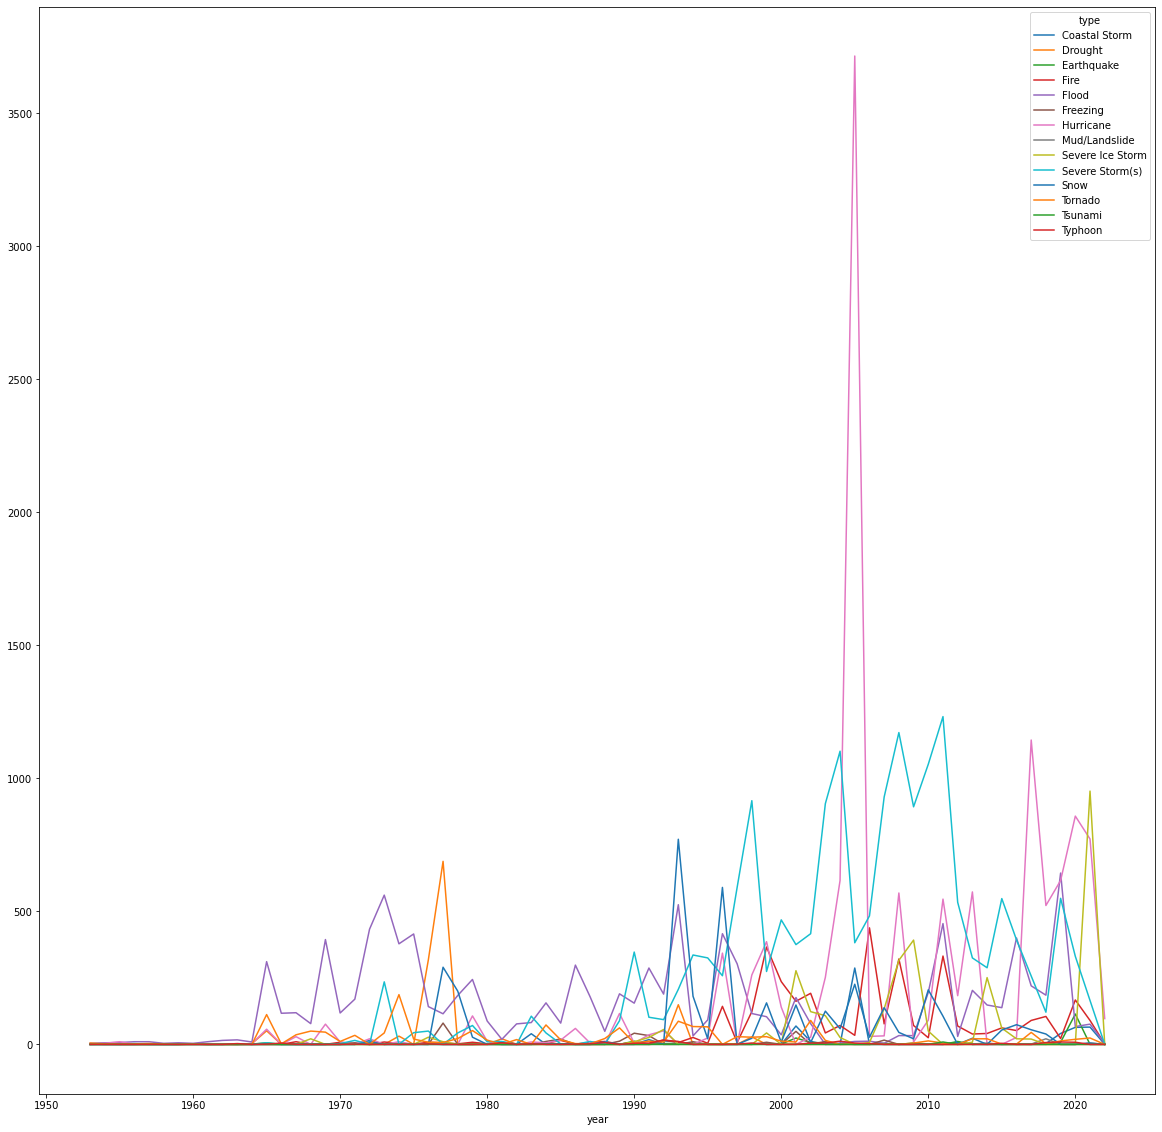

In [4]:
from matplotlib.cm import get_cmap


pdf = pd.DataFrame(df,columns=['fy_declared','incident_type'])

#print(pdf)

pdf = pdf.rename(columns={'fy_declared':'year','incident_type':'type'})

pdf['dummy'] = np.ones(len(df)) # CHanged this to len(df) for it to be more dynamic
pdf = pdf.groupby(by=['year','type']).count().unstack()


pdf = pdf['dummy']
pdf = pdf.fillna(0)

pdf.plot(figsize =(20,20))
#print(pdf.columns)



In [5]:
disaster_nums = df['disaster_number'].drop_duplicates()

num = 0
disaster_nums = disaster_nums.to_list()
repeated_disasters = []

for index, row in df.iterrows():
    if num > len(disaster_nums) - 1:
        repeated_disasters.append(index)
    elif row.disaster_number != disaster_nums[num]:
        repeated_disasters.append(index)
    else:
        num += 1

df = df.drop(repeated_disasters)
print(len(df))

df.head()

4387


,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,bb121323c9c29d3bef0c9a3f134bfd8b5ecff148,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025780
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,c879557e78d059e6847e7688388c339d10f51979,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025783
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,4fb19699fdbba1387ffa2263fcc4a4e37a1de6d6,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025777
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,87a0c1dd5da249767f545e0c0a43f917e4e9ca83,2021-07-13T23:01:19Z,60c3b7a9a0ee349d7102577a
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,954449c15634fb45c8bea3ac975782793ccde050,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025774


<AxesSubplot:xlabel='year'>

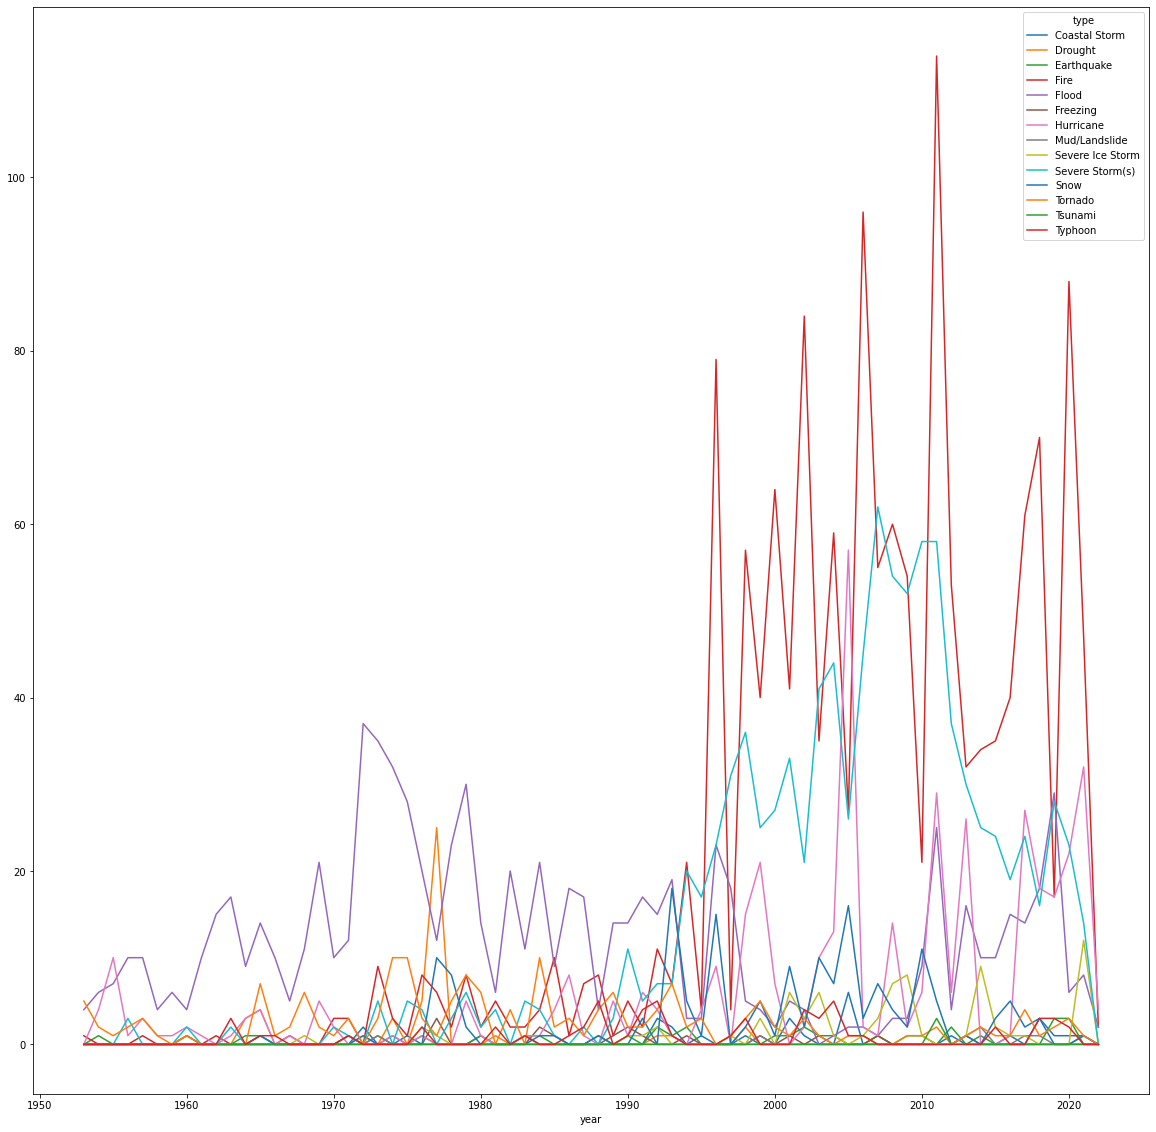

In [6]:

pdf = pd.DataFrame(df,columns=['fy_declared','incident_type'])

#print(pdf)

pdf = pdf.rename(columns={'fy_declared':'year','incident_type':'type'})

pdf['dummy'] = np.ones(len(df)) # CHanged this to len(df) for it to be more dynamic
pdf = pdf.groupby(by=['year','type']).count().unstack()


pdf = pdf['dummy']
pdf = pdf.fillna(0)

pdf.plot(figsize =(20,20))

# pdf.drop([len(pdf)-1])
#print(pdf.columns)

## Mapping the Natural Disaster across the US in an interactive map

In order to map these disasters on an interactive map , we need to know the longitude and latitude of the locations. However, we are NOT given this, so what we can do is go onto a website like 

https://www.latlong.net/category/states-236-14.html

And pull the data from a table on there directly. The table on that site contains the state name and the longitude and latitude of the middle of the state

## Pulling the State data

In [7]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy
import requests
import datetime

r = requests.get("https://rvark2002.github.io/Stateswithlatlong.html")

root = BeautifulSoup( r.content, 'html.parser')

data = root.find("body").find("main").findAll("table")

data = str(data)
data = data[2500:]

state_table = pd.read_html(str(data))

print(state_table)

[               Place Name   Latitude   Longitude
0          Wisconsin, USA  44.500000  -89.500000
1      West Virginia, USA  39.000000  -80.500000
2        Vermont, the USA  44.000000  -72.699997
3          Texas, the USA  31.000000 -100.000000
4    South Dakota, the US  44.500000 -100.000000
5    Rhode Island, the US  41.700001  -71.500000
6          Oregon, the US  44.000000 -120.500000
7           New York, USA  43.000000  -75.000000
8   New Hampshire, the US  44.000000  -71.500000
9        Nebraska, the US  41.500000 -100.000000
10         Kansas, the US  38.500000  -98.000000
11    Mississippi, the US  33.000000  -90.000000
12          Illinois, USA  40.000000  -89.000000
13       Delaware, the US  39.000000  -75.500000
14    Connecticut, the US  41.599998  -72.699997
15       Arkansas, the US  34.799999  -92.199997
16           Indiana, USA  40.273502  -86.126976
17          Missouri, USA  38.573936  -92.603760
18           Florida, USA  27.994402  -81.760254
19            Nevad

## Modifying the table

Unfortunately for us, the Location in the table above is not in the state abbreviation format that we want so our next task is to fix that

In [8]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy
import requests
import datetime
import folium

r = requests.get("https://rvark2002.github.io/Stateswithlatlong.html")

root = BeautifulSoup( r.content, 'html.parser')

data = root.find("body").find("main").findAll("table")

data = str(data)
data = data[2500:]

state_table = pd.read_html(str(data))

state_df = state_table[0]
state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}

for i, row in state_df.iterrows():
    s = str(state_df.at[i,'Place Name'])   
    s = s[0:s.index(",")];
    state_df.at[i,'Place Name'] = state_to_abbrev[s]
    
print(state_df)

   Place Name   Latitude   Longitude
0          WI  44.500000  -89.500000
1          WV  39.000000  -80.500000
2          VT  44.000000  -72.699997
3          TX  31.000000 -100.000000
4          SD  44.500000 -100.000000
5          RI  41.700001  -71.500000
6          OR  44.000000 -120.500000
7          NY  43.000000  -75.000000
8          NH  44.000000  -71.500000
9          NE  41.500000 -100.000000
10         KS  38.500000  -98.000000
11         MS  33.000000  -90.000000
12         IL  40.000000  -89.000000
13         DE  39.000000  -75.500000
14         CT  41.599998  -72.699997
15         AR  34.799999  -92.199997
16         IN  40.273502  -86.126976
17         MO  38.573936  -92.603760
18         FL  27.994402  -81.760254
19         NV  39.876019 -117.224121
20         ME  45.367584  -68.972168
21         MI  44.182205  -84.506836
22         GA  33.247875  -83.441162
23         HI  19.741755 -155.844437
24         AK  66.160507 -153.369141
25         TN  35.860119  -86.660156
2

## Plotting the points!

Great now that we have redid the table so that its in state abbreviation form, lets plot our points

In [9]:

#Working on the map

#Dictionary of all weather types and color code
weather_to_color = {
    "Coastal Storm": 'darkblue',
    "Drought": 'orange',
    'Earthquake': 'green',
    'Fire': 'red',
    'Flood': 'purple',
    'Freezing': 'darkpurple',
    'Hurricane': 'pink',
    'Mud/Landslide': 'beige',
    'Severe Ice Storm': 'blue',
    'Severe Storm(s)': 'lightgray',
    'Snow': 'white',
    'Tornado': 'lightred',
    'Tsunami': 'cadetblue',
    'Typhoon': 'lightblue',
    
}

map_osm = folium.Map(location=[39.29, -76.61], zoom_start=5)

#print(df)

for index,row in df.iterrows():
        if df.at[index,'fy_declared'] > 2017:
            color = weather_to_color[df.at[index,'incident_type']]
            state = df.at[index,'state']
            desc = 'Incident: '+df.at[index,'incident_type']+'\nState: '+state+'\nDate: '+df.at[index,'declaration_date']+'\nFema Declaration '+df.at[index,'fema_declaration_string']
         
            
            
            lat = "15"
            long = "145"
            
            randomval1 = random.uniform(-1.20,1.20)
            randomval2 = random.uniform(-1.20,1.20)
            #to prevent clutter ^
        
            for j,r in state_df.iterrows():
                if state_df.at[j,'Place Name'] == state:
                    lat = str(float(state_df.at[j,'Latitude']) + randomval1)
                    long = str(float(state_df.at[j,'Longitude']) + randomval2)
            
            
            folium.Marker(
            location=[lat,long],
            popup=str(desc),
            icon=folium.Icon(color=color),
            ).add_to(map_osm)
       

map_osm     

## 



In [10]:
pdf.head()

type,Coastal Storm,Drought,Earthquake,Fire,Flood,Freezing,Hurricane,Mud/Landslide,Severe Ice Storm,Severe Storm(s),Snow,Tornado,Tsunami,Typhoon
year,,,,,,,,,,,,,,
1953,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1954,0.0,0.0,1.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1955,0.0,0.0,0.0,0.0,7.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1956,0.0,0.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0
1957,0.0,0.0,0.0,1.0,10.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [11]:
# Getting number of natural disasters per year:


pd.set_option('display.max_rows', df.shape[0]+1)
pdf.head()




type,Coastal Storm,Drought,Earthquake,Fire,Flood,Freezing,Hurricane,Mud/Landslide,Severe Ice Storm,Severe Storm(s),Snow,Tornado,Tsunami,Typhoon
year,,,,,,,,,,,,,,
1953,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
1954,0.0,0.0,1.0,0.0,6.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1955,0.0,0.0,0.0,0.0,7.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1956,0.0,0.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0
1957,0.0,0.0,0.0,1.0,10.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [12]:
# import datapackage

# data_url = 'https://datahub.io/core/co2-ppm/datapackage.json'

# # to load Data Package into storage
# package = datapackage.Package(data_url)

# resources = package.resources

# data = []
# for resource in resources:
#     if resource.tabular:
#         # print(resource)
#         data.append(pd.read_csv(resource.descriptor['path']))
       

# cdy = data[1]
# cdy.tail()

In [13]:
if 'totals' in pdf.columns:
    pdf = pdf.drop('totals',1)

totals = []

for index, row in pdf.iterrows():
    t = 0
    for i in row:
        # print(i)
        t += i
    totals.append(t)

pdf['totals'] = totals
pdf.tail()



type,Coastal Storm,Drought,Earthquake,Fire,Flood,Freezing,Hurricane,Mud/Landslide,Severe Ice Storm,Severe Storm(s),Snow,Tornado,Tsunami,Typhoon,totals
year,,,,,,,,,,,,,,,
2018,3.0,0.0,0.0,70.0,18.0,0.0,18.0,1.0,0.0,16.0,3.0,1.0,0.0,3.0,133.0
2019,1.0,0.0,3.0,17.0,29.0,0.0,17.0,0.0,0.0,28.0,0.0,2.0,0.0,3.0,100.0
2020,1.0,0.0,3.0,88.0,6.0,0.0,22.0,0.0,0.0,23.0,0.0,3.0,0.0,2.0,148.0
2021,1.0,0.0,0.0,47.0,8.0,0.0,32.0,1.0,12.0,14.0,1.0,1.0,0.0,0.0,117.0
2022,0.0,0.0,0.0,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


<AxesSubplot:title={'center':'Life Expectancy'}, xlabel='year', ylabel='totals'>

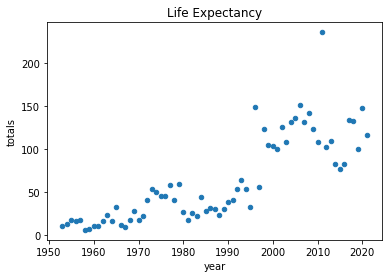

In [14]:
years = range(1953,2023)
pdf['year'] = years

pdf.drop(pdf[pdf['year'] ==2022].index, inplace = True)

pdf.plot(x = 'year', y = 'totals', kind='scatter',title= 'Total Number of Natural Disasters per Year')


2.0636463280964557x -4037.0014858117156 -> for 1951 < x < 2008 


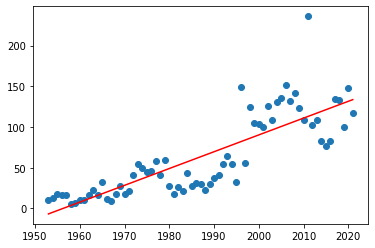

In [25]:
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures

x = pdf['year'].values.reshape(-1, 1)
y = pdf['totals'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(x, y)

y_pred = reg.predict(x)

print (str(reg.coef_[0][0])+ 'x '+ str(reg.intercept_[0])+' -> for 1951 < x < 2008 ')

plt.scatter(x,y)
plt.plot(x, y_pred, color='red')

In [27]:

poly_degree = 5
x = pdf.loc[:,"year"]
min_x, rng_x = (np.min(x), np.max(x) - np.min(x))
x = 2*(x - min_x)/rng_x - 1.0
y = pdf.loc[:,"totals"]
X = np.vstack([x**i for i in range(poly_degree,-1,-1)]).T
theta = np.linalg.solve(X.T.dot(X), X.T.dot(y))



x0 = 2*(np.linspace(-1, 1,1000) - min_x)/rng_x - 1.0
X0 = np.vstack([x0**i for i in range(poly_degree,-1,-1)]).T
y0 = X0.dot(theta)

# plt.plot(x0,y0)

# plo




year
1953   -1.000000
1954   -0.970588
1955   -0.941176
1956   -0.911765
1957   -0.882353
1958   -0.852941
1959   -0.823529
1960   -0.794118
1961   -0.764706
1962   -0.735294
1963   -0.705882
1964   -0.676471
1965   -0.647059
1966   -0.617647
1967   -0.588235
1968   -0.558824
1969   -0.529412
1970   -0.500000
1971   -0.470588
1972   -0.441176
1973   -0.411765
1974   -0.382353
1975   -0.352941
1976   -0.323529
1977   -0.294118
1978   -0.264706
1979   -0.235294
1980   -0.205882
1981   -0.176471
1982   -0.147059
1983   -0.117647
1984   -0.088235
1985   -0.058824
1986   -0.029412
1987    0.000000
1988    0.029412
1989    0.058824
1990    0.088235
1991    0.117647
1992    0.147059
1993    0.176471
1994    0.205882
1995    0.235294
1996    0.264706
1997    0.294118
1998    0.323529
1999    0.352941
2000    0.382353
2001    0.411765
2002    0.441176
2003    0.470588
2004    0.500000
2005    0.529412
2006    0.558824
2007    0.588235
2008    0.617647
2009    0.647059
2010    0.676471
2011    0